In [83]:
import rasterio
import rasterio.plot
import rasterio.warp
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import warnings
warnings.filterwarnings('ignore')

In [37]:
mypath = "./data/"
onlyfiles = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]

In [38]:
onlyfiles

['./data/Hansen_GFC-2018-v1.6_datamask_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_first_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_lossyear_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_gain_10N_010E.tif']

In [39]:
for file in onlyfiles:
    with rasterio.open(file) as src:
        print(file)
        print(src.profile)
        print(src.bounds)
        print("----------")

./data/Hansen_GFC-2018-v1.6_datamask_10N_010E.tif
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, 10.0,
       0.0, -0.00025, 10.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
BoundingBox(left=10.0, bottom=0.0, right=20.0, top=10.0)
----------
./data/Hansen_GFC-2018-v1.6_first_10N_010E.tif
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, 10.0,
       0.0, -0.00025, 10.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}
BoundingBox(left=10.0, bottom=0.0, right=20.0, top=10.0)
----------
./data/Hansen_GFC-2018-v1.6_lossyear_10N_010E.tif
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, 10.0,
       0.0, -0.00025, 10.0), 'tiled': False

In [7]:
# Thumbnail Won't Load

# with rasterio.open(filepath) as src:
#     oviews = src.overviews(1)
#     oview = oviews[-1]
#     print('Decimation factor= {}'.format(oview))
#     thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

#     thumbnail = thumbnail.astype('f4')
#     thumbnail[thumbnail==0] = np.nan

# plt.imshow(thumbnail)
# plt.colorbar()
# plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')

In [44]:
with rasterio.open(onlyfiles[0]) as dataset:
    print(dataset.indexes)
    print(dataset.crs)

(1,)
EPSG:4326


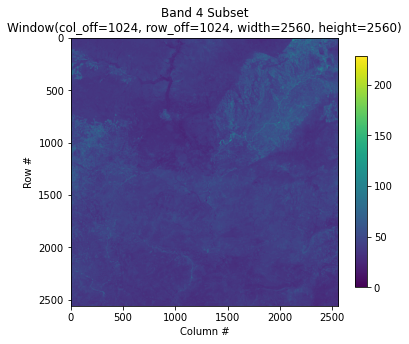

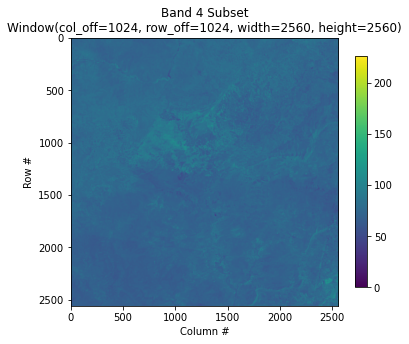

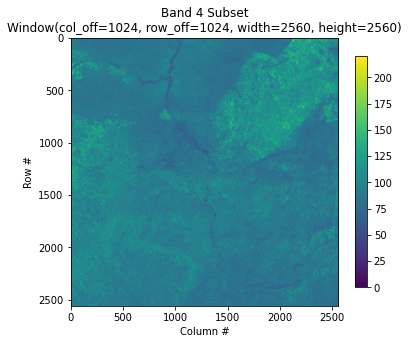

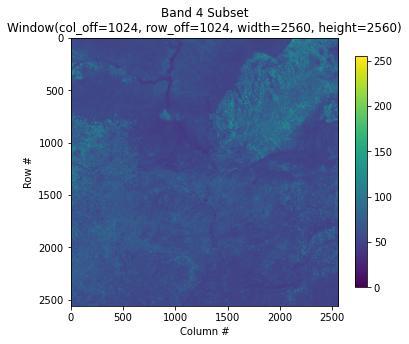

In [51]:
#https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
#rasterio.windows.Window(col_off, row_off, width, height)
window = rasterio.windows.Window(1024, 1024, 2560, 2560)

with rasterio.open(onlyfiles[1]) as src:
    all_rasters = {}
    for number in range(1,5):
        subset = src.read(number, window=window)
        all_rasters[number] = subset
        plt.figure(figsize=(6,8.5))
        plt.imshow(subset)
        plt.colorbar(shrink=0.5)
        plt.title(f'Band 4 Subset\n{window}')
        plt.xlabel('Column #')
        plt.ylabel('Row #')

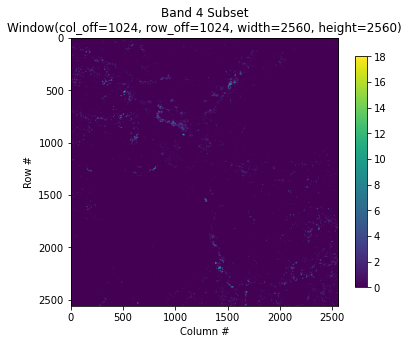

In [58]:
# adding loss_year layer 

#https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
#rasterio.windows.Window(col_off, row_off, width, height)
window = rasterio.windows.Window(1024, 1024, 2560, 2560)
with rasterio.open(onlyfiles[2]) as src:
    subset = src.read(1, window=window)
    all_rasters[5] = subset
    plt.figure(figsize=(6,8.5))
    plt.imshow(subset)
    plt.colorbar(shrink=0.5)
    plt.title(f'Band 4 Subset\n{window}')
    plt.xlabel('Column #')
    plt.ylabel('Row #')

In [59]:
all_rasters

{1: array([[41, 37, 37, ..., 37, 41, 38],
        [41, 37, 39, ..., 43, 39, 37],
        [41, 39, 41, ..., 43, 40, 40],
        ...,
        [32, 33, 33, ..., 30, 29, 29],
        [32, 33, 33, ..., 29, 29, 29],
        [32, 34, 33, ..., 28, 29, 30]], dtype=uint8),
 2: array([[73, 79, 80, ..., 69, 71, 75],
        [75, 78, 76, ..., 71, 72, 77],
        [74, 77, 77, ..., 73, 76, 76],
        ...,
        [64, 65, 65, ..., 87, 85, 85],
        [64, 64, 64, ..., 88, 88, 81],
        [64, 64, 63, ..., 83, 85, 83]], dtype=uint8),
 3: array([[92, 92, 91, ..., 91, 94, 90],
        [93, 92, 94, ..., 99, 92, 87],
        [95, 95, 95, ..., 99, 89, 90],
        ...,
        [85, 87, 84, ..., 82, 80, 82],
        [85, 85, 85, ..., 80, 82, 80],
        [87, 88, 88, ..., 78, 81, 80]], dtype=uint8),
 4: array([[61, 61, 60, ..., 56, 62, 56],
        [61, 60, 63, ..., 66, 60, 55],
        [62, 63, 64, ..., 63, 56, 57],
        ...,
        [55, 56, 55, ..., 49, 49, 49],
        [55, 54, 55, ..., 49, 48,

/Users/purgatorid/.local/share/virtualenvs/tiff-explore-TwY5KnPB/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0, 0.5, 'Row #')

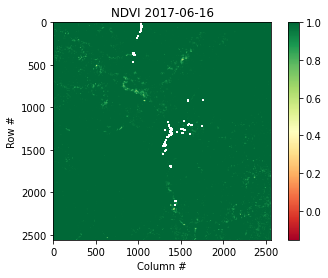

In [65]:
# attempt at NDVI processing

def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(all_rasters[1],all_rasters[5])
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')


## Save the NDVI raster to local disk

In [69]:
onlyfiles

['./data/Hansen_GFC-2018-v1.6_datamask_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_first_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_lossyear_10N_010E.tif',
 './data/Hansen_GFC-2018-v1.6_gain_10N_010E.tif']

In [72]:
filename = 'test.tif'

with rasterio.open(onlyfiles[1]) as src:
    profile = src.profile.copy()

    aff = src.transform
    newaff = rasterio.Affine(aff.a * oview, aff.b, aff.c,
                             aff.d, aff.e * oview, aff.f)
    profile.update({
            'dtype': 'float32',
            'height': ndvi.shape[0],
            'width': ndvi.shape[1],
            'transform': newaff})  

    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1, ndvi)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2560, 'height': 2560, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0022500000000000003, 0.0, 10.0,
       0.0, -0.0022500000000000003, 10.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}


Text(0, 0.5, 'Row #')

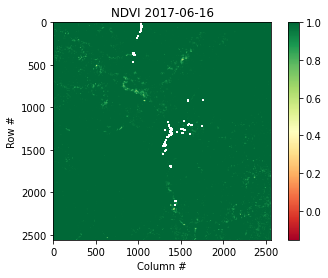

In [136]:
# Reopen the file and plot
with rasterio.open(filename) as src:
    print(src.profile)
    ndvi = src.read(1) # read the entire array

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

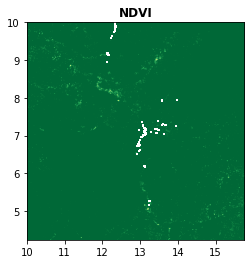

In [138]:
#geo-coordinates version

# in this case, coordinates are Easting [m] and Northing [m], and colorbar is default instead of RdYlGn
with rasterio.open(filename) as src:
    fig, ax = plt.subplots()
    rasterio.plot.show(src, ax=ax, title='NDVI', cmap='RdYlGn')

# Convert desired lat/lon to location in TIFF 

In [134]:
with rasterio.open(onlyfiles[2]) as src:
    # Use pyproj to convert point coordinates
    utm = pyproj.Proj(src.crs) # Pass CRS of image from rasterio
    lonlat = pyproj.Proj(init='epsg:4326')

    lon,lat = (10, 10)
    east,north = pyproj.transform(lonlat, utm, lon, lat)

    print('Congo Basin NDVI\n-------')
    print(f'lon,lat=\t\t({lon:.2f},{lat:.2f})')
    print(f'easting,northing=\t({east:g},{north:g})')

    # What is the corresponding row and column in our image?
    row, col = src.index(east, north) # spatial --> image coordinates
    print(f'row,col=\t\t({row},{col})')

    # What is the NDVI?
    value = ndvi[row, col]
    print(f'ndvi=\t\t\t{value:.2f}')


    # Or if you see an interesting feature and want to know the spatial coordinates:
    row, col = 200, 450
    east, north = src.xy(row,col) # image --> spatial coordinates
    lon,lat = pyproj.transform(utm, lonlat, east, north)
    value = ndvi[row, col]
    print(f'''
Interesting Feature
-------
row,col=          ({row},{col})
easting,northing= ({east:g},{north:g})
lon,lat=          ({lon:.2f},{lat:.2f})
ndvi=              {value:.2f}
''')

Congo Basin NDVI
-------
lon,lat=		(10.00,10.00)
easting,northing=	(10,10)
row,col=		(0,0)
ndvi=			1.00

Interesting Feature
-------
row,col=          (200,450)
easting,northing= (10.1126,9.94987)
lon,lat=          (9.95,10.11)
ndvi=              1.00



# Calculate change in NDVI over time

In [25]:
# Use the same example image:
date2 = '2020-06-12'
url2 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20180619_20180703_01_T1/'
redband2 = 'LC08_L1TP_042034_20180619_20180703_01_T1_B{}.TIF'.format(4)
nirband2 = 'LC08_L1TP_042034_20180619_20180703_01_T1_B{}.TIF'.format(5)

filepath = url2+redband2
with rasterio.open(filepath) as src:
    print('Opening:', filepath)
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red2 = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

filepath = url2+nirband2
with rasterio.open(filepath) as src:
    print('Opening:', filepath)
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    nir2 = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

ndvi2 = calc_ndvi(nir2, red2)

Opening: http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20180619_20180703_01_T1/LC08_L1TP_042034_20180619_20180703_01_T1_B4.TIF
Decimation factor= 9
Opening: http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20180619_20180703_01_T1/LC08_L1TP_042034_20180619_20180703_01_T1_B5.TIF
Decimation factor= 9


/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Text(0.5, 1.0, 'Diff (2018-06-19 - 2017-06-16)')

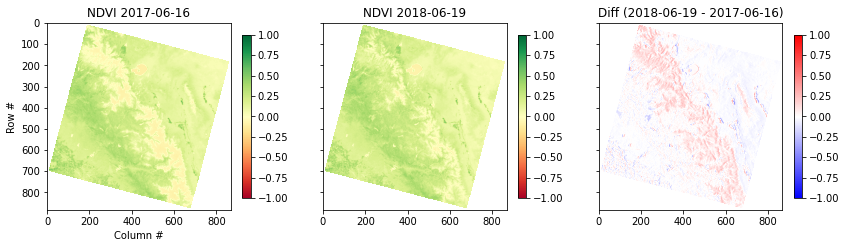

In [26]:
fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)

plt.sca(axes[0])
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.sca(axes[1])
plt.imshow(ndvi2, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('NDVI {}'.format(date2))

plt.sca(axes[2])
plt.imshow(ndvi2 - ndvi, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Diff ({} - {})'.format(date2, date))

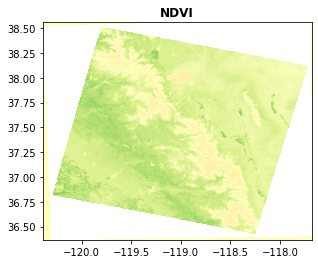

In [27]:
import rasterio.warp
import rasterio.shutil

localname = 'LC08_L1TP_042034_20170616_20170629_01_T1_NDVI_OVIEW.tif'
vrtname = 'LC08_L1TP_042034_20170616_20170629_01_T1_NDVI_OVIEW_WGS84.vrt'

with rasterio.open(localname) as src:
    with rasterio.vrt.WarpedVRT(src, crs='epsg:4326', resampling=rasterio.enums.Resampling.bilinear) as vrt:
        rasterio.shutil.copy(vrt, vrtname, driver='VRT')

# Open the local warped file and plot
# NOTE our coordinates have changed to lat, lon. we should probably crop the edge artifacts do to reprojection too!
with rasterio.open(vrtname) as src:
    rasterio.plot.show(src, title='NDVI', cmap='RdYlGn', vmin=-1, vmax=1)

In [28]:
localname = 'LC08_L1TP_042034_20170616_20170629_01_T1_NDVI_OVIEW.tif'
tifname = 'LC08_L1TP_042034_20170616_20170629_01_T1_NDVI_OVIEW_WGS84.tif'

dst_crs = 'EPSG:4326'

with rasterio.open(localname) as src:
    profile = src.profile.copy()

    transform, width, height = rasterio.warp.calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    profile.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(tifname, 'w', **profile) as dst:
        rasterio.warp.reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=rasterio.warp.Resampling.bilinear)